# Aula 1

In [32]:
import pandas as pd

In [33]:
co2 = pd.read_csv('dados/co2.csv', sep='\t')

In [34]:
co2.head()

,data,media
0,1980.042,338.45
1,1980.125,339.15
2,1980.208,339.48
3,1980.292,339.87
4,1980.375,340.30


In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette('icefire')
sns.set_style('darkgrid')
sns.set(font_scale=1.1)

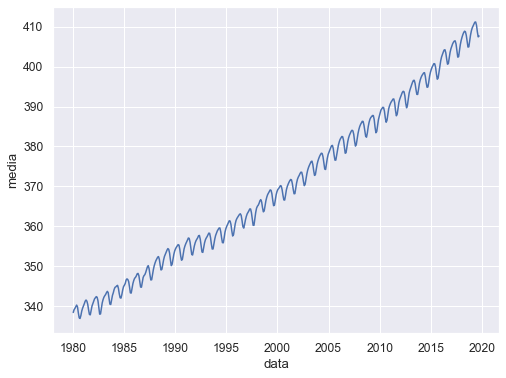

In [36]:
ax = sns.lineplot(x='data', y='media', data=co2)
ax.figure.set_size_inches(8,6)


In [37]:
nasc = pd.read_csv('dados/nascimentos.csv')

In [38]:
nasc.head()

,data,n_nasc
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


<AxesSubplot:>

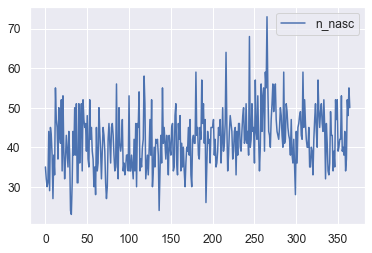

In [39]:
sns.lineplot(data = nasc)

In [40]:
nasc.data = pd.to_datetime(nasc.data)

In [41]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

Text(0, 0.5, 'Nascimentos')

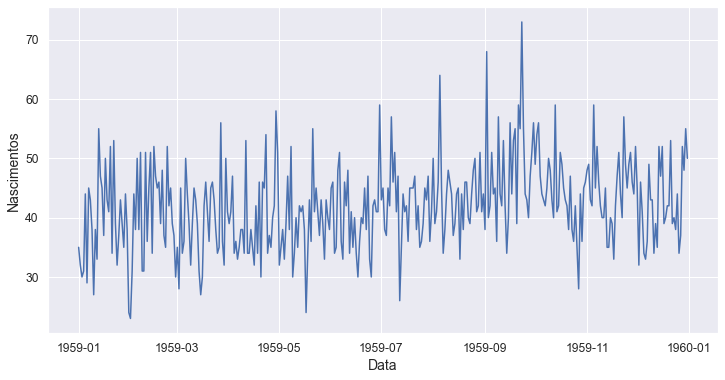

In [42]:
ax = sns.lineplot(x = 'data', y ='n_nasc', data = nasc)
ax.figure.set_size_inches(12,6)
ax.set_xlabel('Data', fontsize = 14)
ax.set_ylabel('Nascimentos', fontsize = 14)

In [43]:
import numpy as np

In [44]:
media_carb = np.mean(co2.media)

In [45]:
dt_carb = co2.data[1] - co2.data[0]

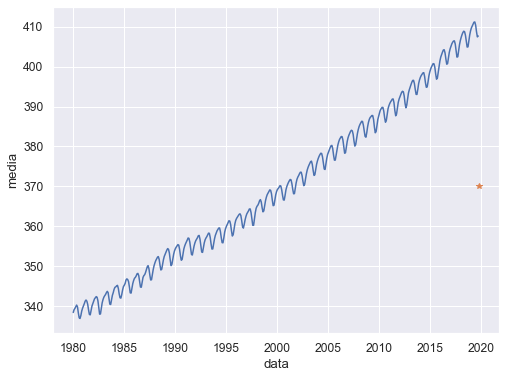

In [46]:
ax = sns.lineplot(x='data', y='media', data=co2)
ax.figure.set_size_inches(8,6)
plt.plot(co2.iloc[-1,0]+dt_carb,media_carb, '*')

In [47]:
media_nasc = np.mean(nasc.n_nasc)
dt_nasc = nasc.data[1] - nasc.data[0]

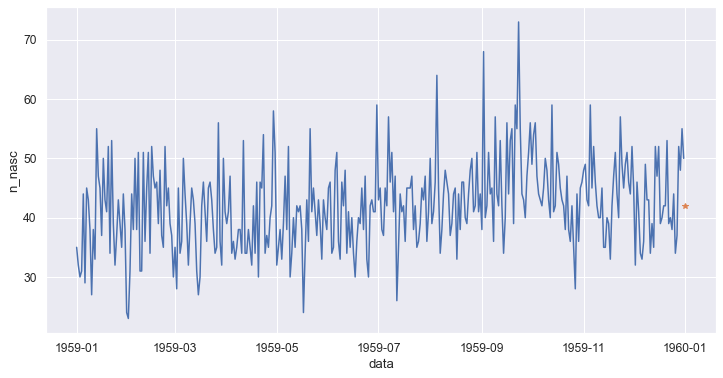

In [48]:
ax = sns.lineplot(x='data', y='n_nasc', data=nasc)
ax.figure.set_size_inches(12, 6)
plt.plot(nasc.iloc[-1,0]+dt_nasc,media_nasc, '*')

In [49]:
co2.shape

(477, 2)

In [50]:
media_tres_pontos_c = np.mean(co2.media[474:747])

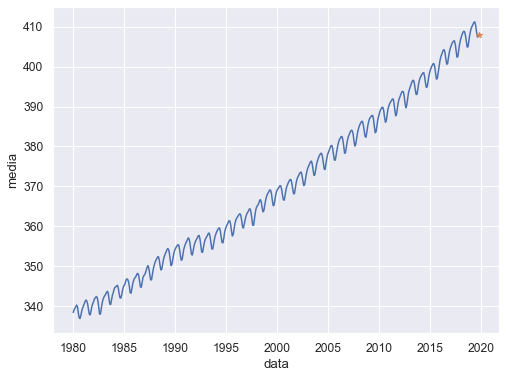

In [51]:
ax = sns.lineplot(x='data', y='media', data=co2)
ax.figure.set_size_inches(8,6)
plt.plot(co2.iloc[-1,0]+dt_carb,media_tres_pontos_c, '*')

In [52]:
nasc.shape

(365, 2)

In [53]:
media_tres_pontos_n = np.mean(nasc.n_nasc[362:365])

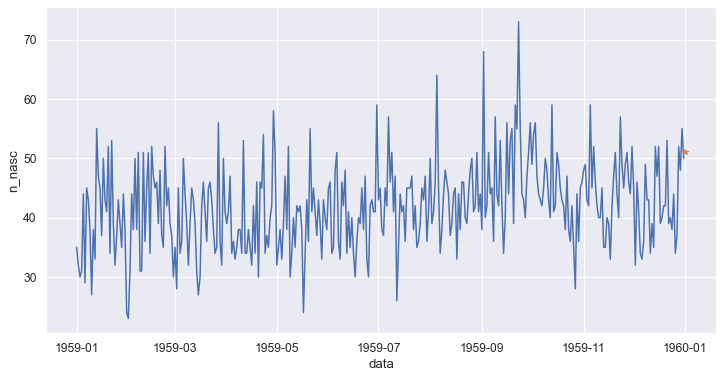

In [54]:
ax = sns.lineplot(x='data', y='n_nasc', data=nasc)
ax.figure.set_size_inches(12, 6)
plt.plot(nasc.iloc[-1,0]+dt_nasc,media_tres_pontos_n, '*')

# Aula 2

In [55]:
media_movel_c = co2.rolling(5).mean()

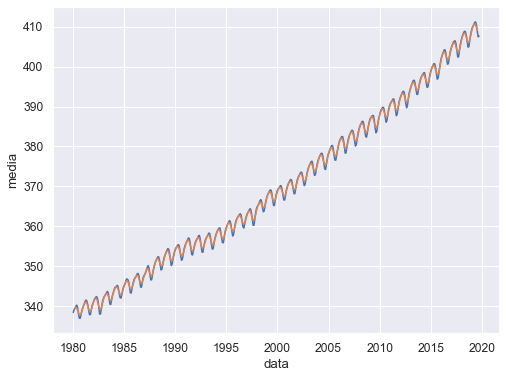

In [56]:
ax = sns.lineplot(x='data', y='media', data=co2)
plt.plot(media_movel_c.data, media_movel_c.media)
ax.figure.set_size_inches(8,6)


In [57]:
media_movel_nasc = nasc.rolling(5).mean()

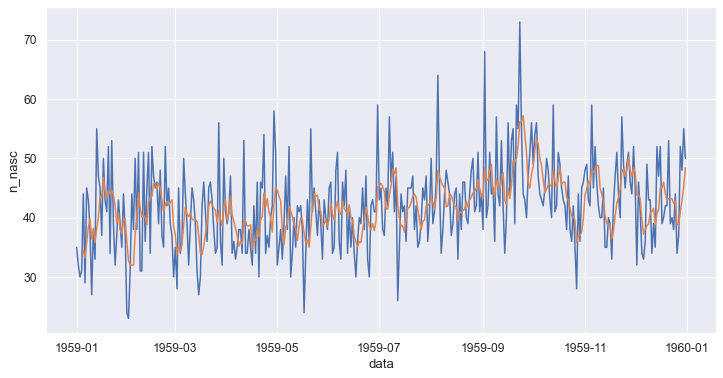

In [58]:
ax = sns.lineplot(x='data', y='n_nasc', data=nasc)
ax.figure.set_size_inches(12, 6)
plt.plot(nasc.data, media_movel_nasc.n_nasc)

In [59]:
 from statsmodels.tsa.seasonal import seasonal_decompose

In [60]:
result_c = seasonal_decompose(co2.set_index('data'), period=35)

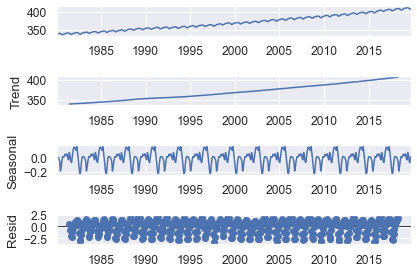

In [61]:
result_c.plot();

In [62]:
result_n = seasonal_decompose(nasc.set_index('data'), period=35)

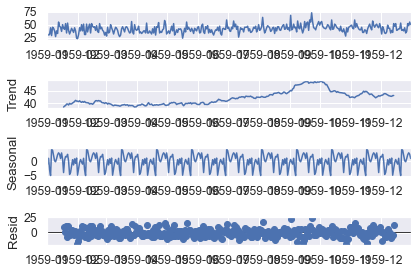

In [63]:
result_n.plot();

## Análise da estacionaridade da variavel média

<AxesSubplot:>

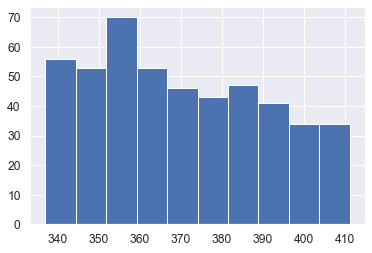

In [64]:
co2.media.hist()

In [65]:
divide = int(co2.shape[0]/2)

In [66]:
x = co2.media.values

In [67]:
c1, c2 = x[0:divide], x[divide:]

In [68]:
c1.mean()

352.31550420168065

In [69]:
c2.mean()

387.816359832636

In [70]:
c1.var()

73.90219533401597

In [71]:
c2.var()

151.542490933282

**Grande diferença entre a media e variancia das metades do grupo**

## Análise da estacionaridade da variavel nascimentos

In [72]:
divide = int(nasc.shape[0] / 2)

In [73]:
x = nasc.n_nasc.values

In [74]:
n1, n2 = x[:divide], x[divide:]

In [75]:
n1.mean()

39.76373626373626

In [76]:
n2.mean()

44.185792349726775

In [77]:
n1.var()

49.21341021615746

In [78]:
n2.var()

48.708650601690096

<AxesSubplot:>

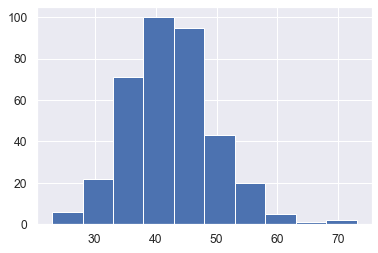

In [79]:
nasc.n_nasc.hist()

**Pouca diferença entre a media e variancia das metades do grupo**

## ADF (Augmented Dickey-Fuller)

In [80]:
from statsmodels.tsa.stattools import adfuller

In [81]:
resultado_c = adfuller(co2.media.values)

In [82]:
print('Estatística ADF', resultado_c[0])

Estatística ADF 3.036828829166984


**Quanto mais negativo for o resultado maior será a estacionaridade**

In [83]:
print('p-valor', resultado_c[1])

p-valor 1.0


**Menor que 0.05 é estacionaria**

In [84]:
resultado_n = adfuller(nasc.n_nasc.values)

In [85]:
resultado_n[0]

-4.808291253559765

In [86]:
resultado_n[1]

5.2434129901498554e-05

**Estatística de ADF e o p-valor mostra uma estacionadirade da variável**

# Aula 3

In [88]:
co2.set_index('data', inplace=True)
co2

,media
data,
1980.042,338.45
1980.125,339.15
1980.208,339.48
1980.292,339.87
1980.375,340.30
...,...
2019.375,411.16
2019.458,410.35
2019.542,408.69


In [89]:
co2_treino = co2[1980.042:2015]
co2_teste = co2[2015:]

In [90]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [92]:
modelo_ajustado = SimpleExpSmoothing(co2_treino).fit(smoothing_level = 0.5)

F:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [93]:
co2_teste.shape

(57, 1)

In [99]:
modelo_previsto = modelo_ajustado.forecast(57)

F:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


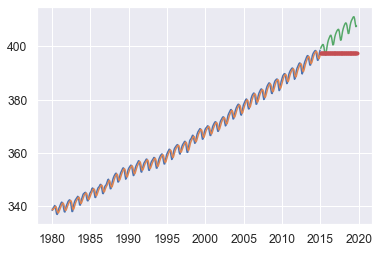

In [100]:
plt.plot(co2_treino)
plt.plot(co2_treino.index, modelo_ajustado.fittedvalues)
plt.plot(co2_teste, 'g')
plt.plot(co2_teste.index, modelo_previsto, 'r.')

In [101]:
nasc.set_index('data', inplace = True)

In [103]:
nasc_treino = nasc['1959-01-01' : '1959-12-01']

In [104]:
nasc_teste = nasc['1959-12-01':]

In [106]:
modelo_ajustado = SimpleExpSmoothing(nasc_treino).fit(smoothing_level=0.5)

F:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [108]:
nasc_teste.shape[0]

31

In [109]:
modelo_previsto = modelo_ajustado.forecast(31)

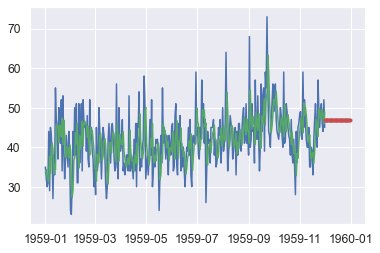

In [111]:
plt.plot(nasc_treino)
plt.plot(nasc_treino.index, modelo_ajustado.fittedvalues, 'g')
plt.plot(nasc_teste.index, modelo_previsto, 'r.')

In [112]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [113]:
modelo_ajustado = ExponentialSmoothing(co2_treino.values, trend='additive', seasonal='additive', seasonal_periods=35).fit()

F:\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


In [116]:
co2_teste.shape

(57, 1)

In [117]:
modelo_previsto = modelo_ajustado.predict(start = 420, end = 476)

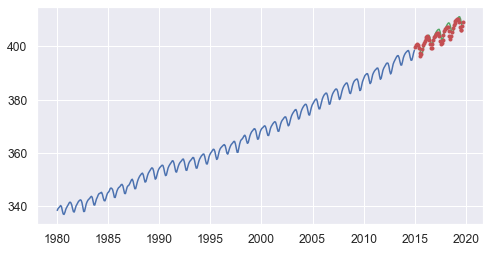

In [121]:
plt.figure(figsize=(8,4))
plt.plot(co2_treino)
plt.plot(co2_teste, 'g')
plt.plot(co2_teste.index, modelo_previsto, 'r.')

In [122]:
modelo_ajustado = ExponentialSmoothing(nasc_treino.values, trend='multiplicative', seasonal=None).fit()

In [125]:
nasc_treino.shape[0]

335

In [127]:
nasc_teste.shape[0]

31

In [128]:
modelo_previsto_suave = modelo_ajustado.predict(start = 335, end = 365)

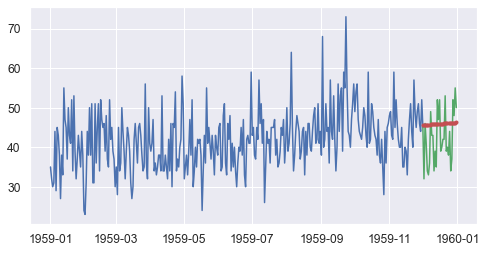

In [130]:
plt.figure(figsize=(8,4))
plt.plot(nasc_treino)
plt.plot(nasc_teste, 'g')
plt.plot(nasc_teste.index, modelo_previsto_suave, 'r.')

# Aula 4

In [131]:
from statsmodels.graphics.tsaplots import plot_acf

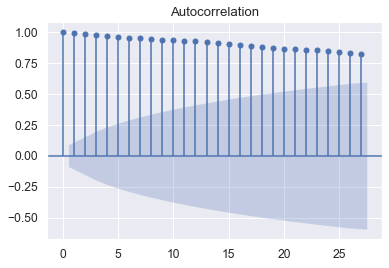

In [132]:
plot_acf(co2);

**Forte autocorrelação na variavel,  apresenta sazionalidade**

In [133]:
from statsmodels.graphics.tsaplots import plot_pacf

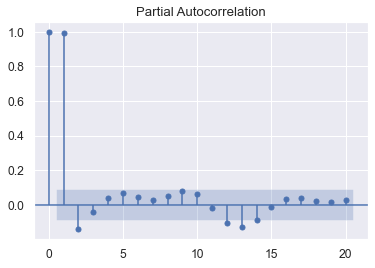

In [135]:
plot_pacf(co2, lags = 20);

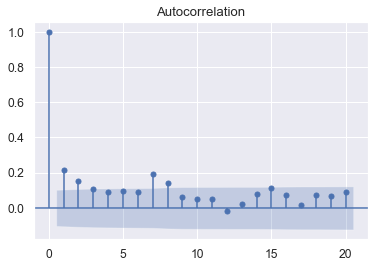

In [137]:
plot_acf(nasc.n_nasc, lags = 20);

**Pequena autocorrelação em alguns pontos, pode apresenta sazionalidade**

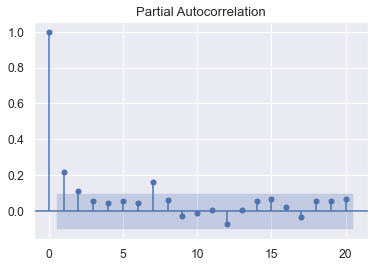

In [139]:
plot_pacf(nasc.n_nasc, lags = 20);

In [140]:
from statsmodels.tsa.ar_model import AutoReg

In [143]:
lista = np.linspace(1,40,40)

In [148]:
modelo_ajustado = AutoReg(co2_treino.values, lags=lista, trend='c', seasonal=True, period=35).fit()

In [150]:
modelo_previsto = modelo_ajustado.predict(start = 420, end=476)

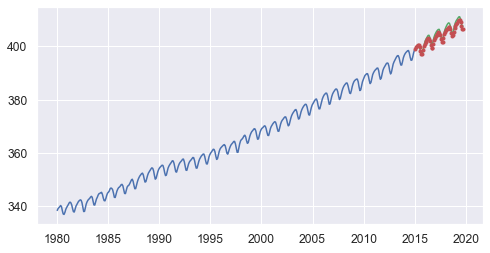

In [151]:
plt.figure(figsize=(8,4))
plt.plot(co2_treino)
plt.plot(co2_teste, 'g')
plt.plot(co2_teste.index, modelo_previsto, 'r.')

In [152]:
modelo_ajustado = modelo_ajustado = AutoReg(nasc_treino.values, lags=lista, trend='c', seasonal=True, period=35).fit()

In [153]:
modelo_previsto_ar = modelo_ajustado.predict(start = 335, end=365)

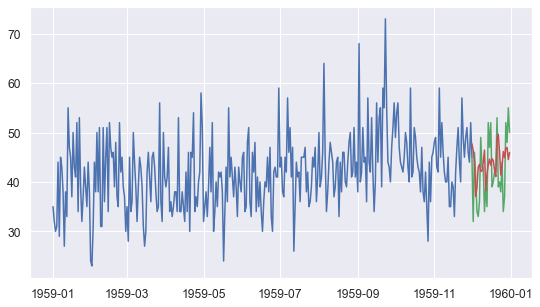

In [157]:
plt.figure(figsize=(9,5))
plt.plot(nasc_treino)
plt.plot(nasc_teste, 'g')
plt.plot(nasc_teste.index, modelo_previsto_ar, 'r')

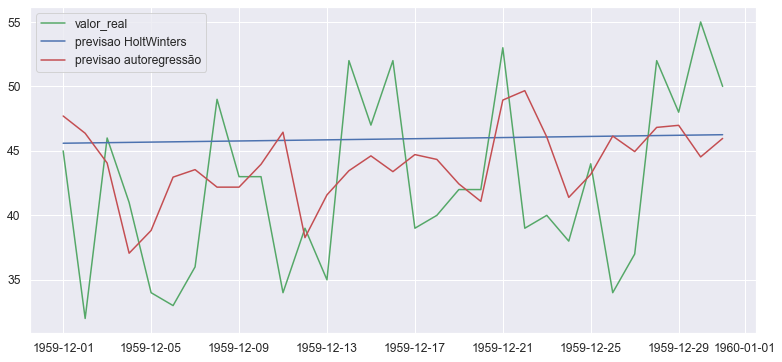

In [162]:
plt.figure(figsize=(13,6))
plt.plot(nasc_teste, 'g', label='valor_real')
plt.plot(nasc_teste.index, modelo_previsto_suave, 'b-', label='previsao HoltWinters')
plt.plot(nasc_teste.index, modelo_previsto_ar, 'r', label='previsao autoregressão')
plt.legend()

In [163]:
Erro_prev_s = nasc_teste.n_nasc - modelo_previsto_suave

In [164]:
Erro_prev = nasc_teste.n_nasc - modelo_previsto_ar

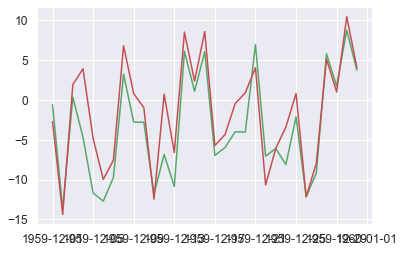

In [166]:
plt.plot(Erro_prev_s, 'g')
plt.plot(Erro_prev, 'r')

In [167]:
Erro_prev_s.mean()

-3.5361248599157498

In [168]:
Erro_prev.mean()

-1.6083080804503544

**O erro pela autoregressão foi menor**

In [169]:
np.abs(Erro_prev_s).mean()

6.374536998569548

In [171]:
np.abs(Erro_prev).mean()

5.4967205480921075

**O erro pela autoregressão foi menor**

In [173]:
from sklearn.metrics import mean_absolute_error

In [178]:
mae = mean_absolute_error(nasc_teste.n_nasc, modelo_previsto_ar)
mae

5.496720548092109

In [179]:
from sklearn.metrics import mean_squared_error

In [181]:
mean_squared_error(nasc_teste.n_nasc, modelo_previsto_suave)

54.39585475772691

In [182]:
mean_squared_error(nasc_teste.n_nasc, modelo_previsto_ar)

45.43739422181419

**O erro pela autoregressão foi menor**